# BLACKBODY RADIATION

## Wien law and Planck distribution

https://en.wikipedia.org/wiki/Planck%27s_law

$\Large B_\nu(\nu, T) = \frac{ 2 h \nu^3}{c^2} \frac{1}{e^\frac{h\nu}{k_\mathrm B T} - 1}$

$\Large B_\lambda(\lambda, T) =\frac{2hc^2}{\lambda^5}\frac{1}{ e^{\frac{hc}{\lambda k_\mathrm B T}} - 1}$


https://en.wikipedia.org/wiki/Wien_approximation

https://commons.wikimedia.org/wiki/File:Mplwp_blackbody_nu_planck-wien-rj_5800K.svg

https://commons.wikimedia.org/wiki/User:Geek3/mplwp

In [1]:
import sympy as s
from IPython.display import Math, display, Markdown

nu, lambda_, h, c, k_B, T = s.symbols('nu, lambda_, h, c, k_B, T')

In [2]:
u = (8*s.pi*h/c**3) * (nu**3 / (s.exp(h*nu/(k_B*T)) - 1))
w = (nu**2*u/c).subs({nu:c/lambda_})

u_ray = 8*s.pi*nu**2*k_B*T/c**3
w_ray = (nu**2*u_ray/c).subs({nu:c/lambda_})

u_wien = 8*s.pi*h*nu**3/c**3 * s.exp(-h*nu/(k_B*T))
w_wien = (nu**2*u_wien/c).subs({nu:c/lambda_})

B_nu = (2*h/c**2) * (nu**3 / (s.exp(h*nu/(k_B*T)) - 1))
B_lambda = (nu**2*B_nu/c).subs({nu:c/lambda_})

In [3]:
display(Markdown("## Stephen Gasiorowicz [Quantum Physics]"))
display(Markdown("### Planck distributions"))
display(Math(r"\large u(\nu, T) = %s"%s.latex(u)))
display(Math(r"\large w(\lambda, T) = %s"%s.latex(w)))

display(Markdown("### Rayleigh-Jeans distributions"))
display(Math(r"\large u(\nu, T) = %s"%s.latex(u_ray)))
display(Math(r"\large w(\lambda, T) = %s"%s.latex(w_ray)))

display(Markdown("### Wien distributions"))
display(Math(r"\large u(\nu, T) = %s"%s.latex(u_wien)))
display(Math(r"\large w(\lambda, T) = %s"%s.latex(w_wien)))


display(Markdown("## https://en.wikipedia.org/wiki/Plancks_law"))
display(Math(r"\large B(\nu, T) = %s"%s.latex(B_nu)))
display(Math(r"\large B_{\lambda}(\lambda, T) = %s"%s.latex(B_lambda)))

display(Math(r"\large u/B_{\nu} = %s, \;\; w/B_{\lambda} = %s"%(s.latex(u/B_nu), s.latex(w/B_lambda))))

## Stephen Gasiorowicz [Quantum Physics]

### Planck distributions

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Rayleigh-Jeans distributions

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Wien distributions

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## https://en.wikipedia.org/wiki/Plancks_law

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from math import *

b = 2.8977729e-3     # m K   Wien yasası sabiti
h = 6.626070040e-34  # J.s   Planck sabiti
c = 2.99792458e8     # m/s   Işık hızı
kB = 1.38064852e-23  # J/K   Boltzman sabiti

# ********************************
# ************ u(ν,T) ************ 
# ********************************
def planck_nu(nu, T):
    f = nu * 1e12
    x = h * f / (kB * T)
    if x > 1e2:
        return 0.0
    return 8*pi*h*f**3/(c**3*(exp(x)-1.0)) * 1e15  # GW m^-3 THz^-2

def rayleigh_jeans_nu(nu, T):
    f = nu * 1e12
    return 8*pi*f**2/c**3 * kB*T * 1e15  # GW m^-3 THz^-2

def wien_nu(nu, T):
    f = nu * 1e12
    x = h * f / (kB * T)
    if x > 1e2:
        return 0.0
    return 8*pi*h*f**3/c**3 * exp(-x) * 1e15  # GW m^-3 THz^-2

# ********************************
# ************ w(λ,T) ************ 
# ********************************
def planck_lu(lu, T):
    ly = lu * 1e-6 # micro_m
    x = h * c / (kB*T*ly)
    return 8*pi*h*c/(ly**5*(exp(x)-1.0))  * 1e-6  # W m^-4 MHz^-1

def rayleigh_jeans_lu(lu, T):
    ly = lu * 1e-6 # micro_m
    return 8*pi* kB*T/ly**4  * 1e-6  # W m^-4 MHz^-1

def wien_lu(lu, T):
    ly = lu * 1e-6 # micro_m
    x = h * c / (kB*T*ly)
    return 8*pi*h*c/ly**5 * exp(-x) * 1e-6  # W m^-4 MHz^-1

## Units of the distributions

### $u(\nu, T) $

$\large 1\,J\,s\,m^{-3} = 1\,W\,s^2\,m^{-3} = 1\,W\,m^{-3}\,Hz^{-2}$

$\large 1\times 10^{-15}\,W\,m^{-3}\,Hz^{-2} = 1 GW\,m^{-3}\,THz^{-2}$


### $w(\lambda, T) $

$\large 1\,J\,m^{-4} = 1\,W\,s\,m^{-4} = 1\,W\,m^{-4}\,Hz^{-1}$

$\large 1\times 10^{-6}\,W\,m^{-4}\,Hz^{-1} = 1\,W\,m^{-4}\,MHz^{-1}$

In [5]:
Temps = [3000, 4000, 5000]
lu_max = [b/T * 1e6 for T in Temps]
nu_max = [c/lu * 1e-6 for lu in lu_max]

print "tempratures =", Temps, "K"
print "lambda_max = ", lu_max, "micro m"
print "nu_max = ", nu_max, "THz"

tempratures = [3000, 4000, 5000] K
lambda_max =  [0.9659243, 0.724443225, 0.57955458] micro m
nu_max =  [310.368481256761, 413.82464167568133, 517.2808020946017] THz


## Distributions as a function of wavelengths

### Application of Wien law

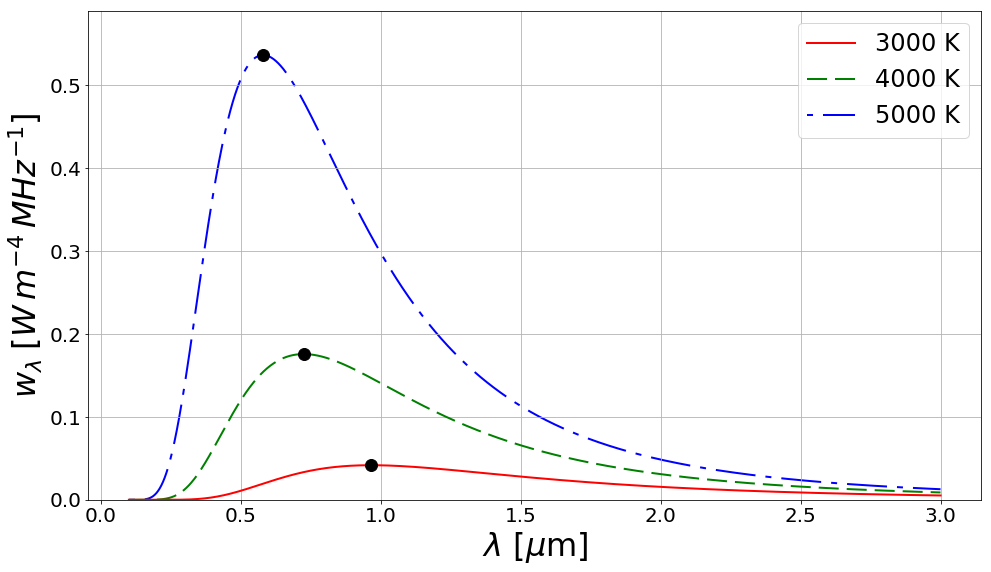

In [6]:
lu_mesh = np.linspace(.1, 3, 1001)

fig = plt.figure(figsize=(16,9))

y_planck1 = [planck_lu(lu, Temps[0]) for lu in lu_mesh]
y_planck2 = [planck_lu(lu, Temps[1]) for lu in lu_mesh]
y_planck3 = [planck_lu(lu, Temps[2]) for lu in lu_mesh]

p01, = plt.plot(lu_max[0], planck_lu(lu_max[0], Temps[0]), "o", zorder=6, ms=12, color="black")
p02, = plt.plot(lu_max[1], planck_lu(lu_max[1], Temps[1]), "o", zorder=5, ms=12, color="black")
p03, = plt.plot(lu_max[2], planck_lu(lu_max[2], Temps[2]), "o", zorder=4, ms=12, color="black")

p1, = plt.plot(lu_mesh, y_planck1, '-', lw=2, color="red", label='%s K'%Temps[0], zorder=3)
p2, = plt.plot(lu_mesh, y_planck2, '-', lw=2, dashes=[10, 4], color="green", label='%s K'%Temps[1], zorder=2)
p3, = plt.plot(lu_mesh, y_planck3, lw=2, color="blue", dashes=[10, 4], label='%s K'%Temps[2], zorder=1)
p3.set_dashes([3, 5, 20, 5])

plt.xlabel(ur'$\lambda$ [$\mu$m]', fontsize=32)
plt.ylabel(ur'$w_{\lambda}\;[W\,m^{-4}\,MHz^{-1}]$', fontsize=32)
plt.legend(loc="best", fontsize=24)
plt.grid(zorder=0)
plt.ylim(0, planck_lu(lu_max[2], Temps[2]) * 1.1)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.savefig("blackbody_spect_vs_wavelength.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0)

plt.show()

### Comparison of distributions

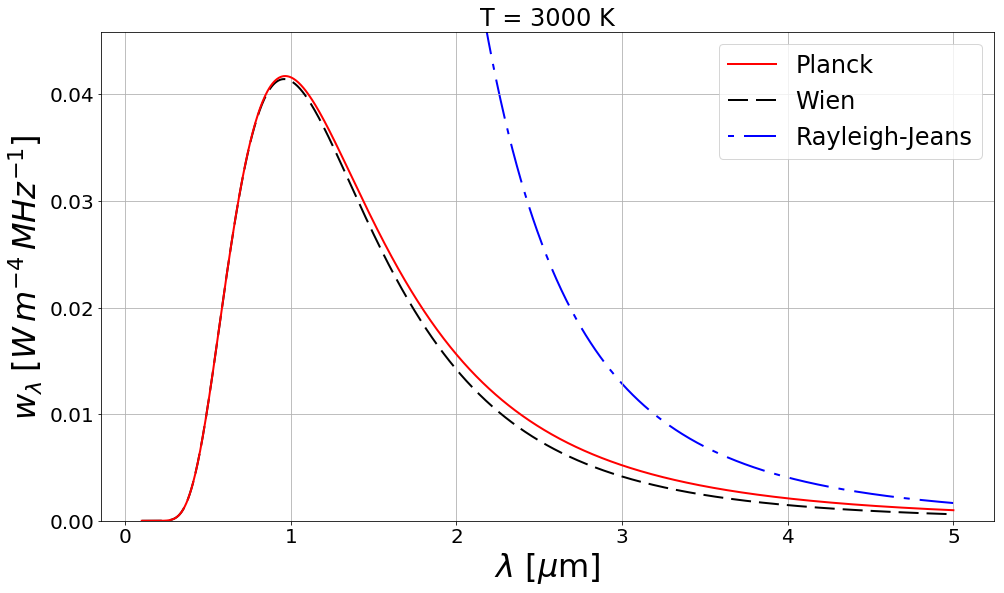

In [7]:
lu_mesh = np.linspace(.1, 5, 1001)

fig = plt.figure(figsize=(16,9))

y_planck = [planck_lu(lu, Temps[0]) for lu in lu_mesh]
y_wien = [wien_lu(lu, Temps[0]) for lu in lu_mesh]
y_rayleigh = [rayleigh_jeans_lu(lu, Temps[0]) for lu in lu_mesh]

p1, = plt.plot(lu_mesh, y_planck, '-', lw=2, color="red", label='Planck', zorder=3)
p2, = plt.plot(lu_mesh, y_wien, '-', lw=2, dashes=[10, 4], color="black", label='Wien', zorder=2)
p3, = plt.plot(lu_mesh, y_rayleigh, lw=2, color="blue", label='Rayleigh-Jeans', zorder=1)
p3.set_dashes([3, 5, 20, 5])

plt.title('T = %s K'%Temps[0], fontsize=24)
plt.xlabel(ur'$\lambda$ [$\mu$m]', fontsize=32)
plt.ylabel(ur'$w_{\lambda}\;[W\,m^{-4}\,MHz^{-1}]$', fontsize=32)
plt.legend(loc="best", fontsize=24)
plt.grid(zorder=0)
plt.ylim(0, planck_lu(lu_max[0], Temps[0]) * 1.1)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.savefig("blackbody_spect_vs_wavelength_diff_models.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0)

plt.show()

### Distrubitons/$T^5$ as a function of $\lambda T$

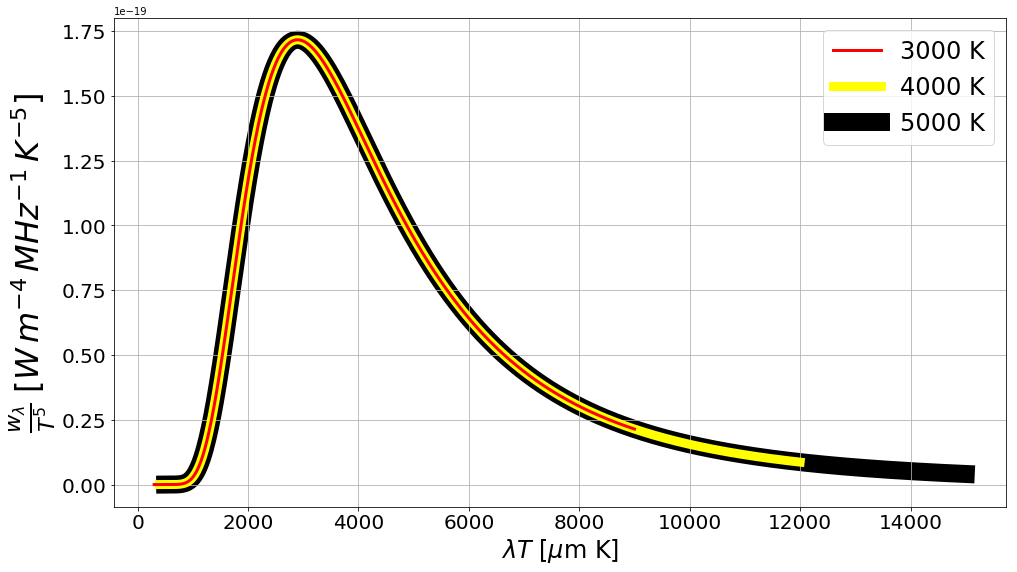

In [8]:
lu_mesh = np.linspace(.1, 3, 1001)

fig = plt.figure(figsize=(16,9))

y_planck1 = [planck_lu(lu, Temps[0])/Temps[0]**5 for lu in lu_mesh]
y_planck2 = [planck_lu(lu, Temps[1])/Temps[1]**5 for lu in lu_mesh]
y_planck3 = [planck_lu(lu, Temps[2])/Temps[2]**5 for lu in lu_mesh]

p1, = plt.plot(lu_mesh*Temps[0], y_planck1, lw=3, color="red", label='%s K'%Temps[0], zorder=3)
p2, = plt.plot(lu_mesh*Temps[1], y_planck2, lw=9, color="yellow", label='%s K'%Temps[1], zorder=2)
p3, = plt.plot(lu_mesh*Temps[2], y_planck3, lw=18, color="black", label='%s K'%Temps[2], zorder=1)
#p3.set_dashes([3, 5, 20, 5])

plt.xlabel(ur'$\lambda T$ [$\mu$m K]', fontsize=24)
plt.ylabel(ur'$\frac{w_{\lambda}}{T^5}\;[W\,m^{-4}\,MHz^{-1}\,K^{-5}]$', fontsize=32)
plt.legend(loc="best", fontsize=24)
plt.grid(zorder=0)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.savefig("blackbody_spect_vs_lambdaT.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0)

plt.show()

## Distributions as a function of frequency

### Application of Wien law ???

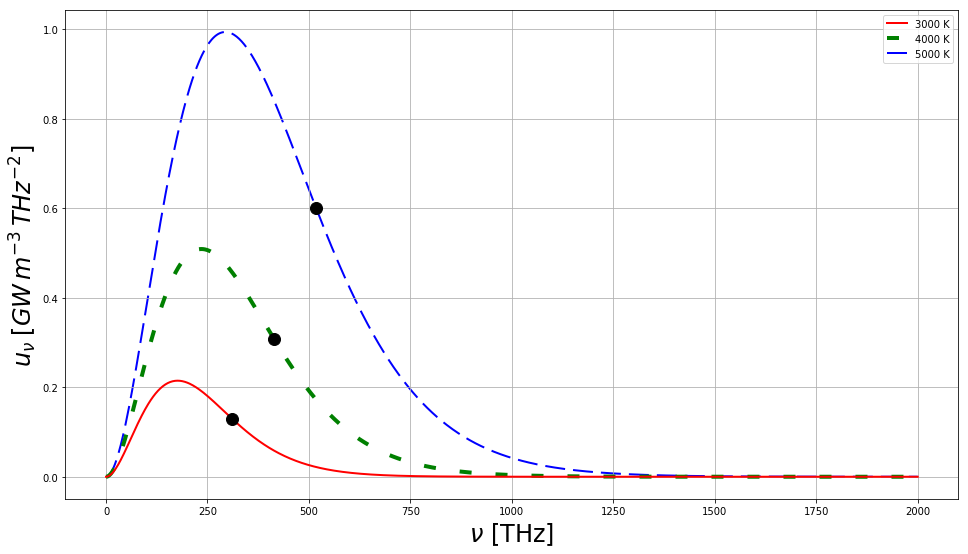

In [9]:
nu_mesh = np.linspace(.1, 2000, 1001)

fig = plt.figure(figsize=(16,9))

y_planck1 = [planck_nu(nu, Temps[0]) for nu in nu_mesh]
y_planck2 = [planck_nu(nu, Temps[1]) for nu in nu_mesh]
y_planck3 = [planck_nu(nu, Temps[2]) for nu in nu_mesh]

p01, = plt.plot(nu_max[0], planck_nu(nu_max[0], Temps[0]), "o", zorder=6, ms=12, color="black")
p02, = plt.plot(nu_max[1], planck_nu(nu_max[1], Temps[1]), "o", zorder=5, ms=12, color="black")
p03, = plt.plot(nu_max[2], planck_nu(nu_max[2], Temps[2]), "o", zorder=4, ms=12, color="black")

p1, = plt.plot(nu_mesh, y_planck1, '-', lw=2, color="red", label='%s K'%Temps[0], zorder=3)
p2, = plt.plot(nu_mesh, y_planck2, ':', lw=4, color="green", dashes=[3, 6], label='%s K'%Temps[1], zorder=2)
p3, = plt.plot(nu_mesh, y_planck3, '--', lw=2, color="blue", dashes=[10, 4], label='%s K'%Temps[2], zorder=1)

plt.xlabel(ur'$\nu$ [THz]', fontsize=24)
plt.ylabel(ur'$u_{\nu}\;[GW\,m^{-3}\,THz^{-2}]$', fontsize=24)
plt.legend(loc="best")
plt.grid(zorder=0)
plt.show()

### Comparison of distributions

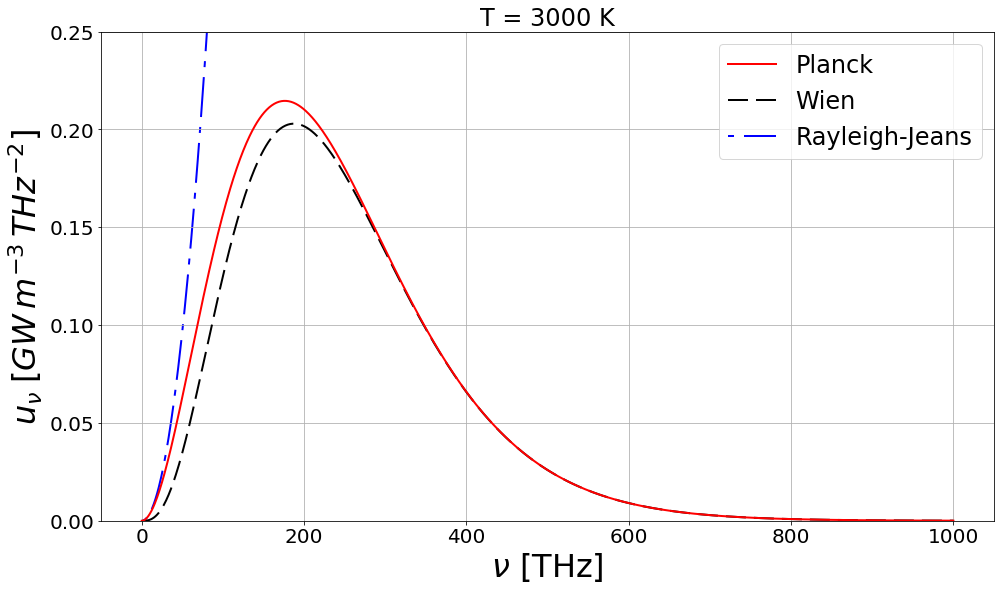

In [10]:
nu_mesh = np.linspace(.1, 1000, 1001)

fig = plt.figure(figsize=(16,9))

y_planck = [planck_nu(nu, Temps[0]) for nu in nu_mesh]
y_wien = [wien_nu(nu, Temps[0]) for nu in nu_mesh]
y_rayleigh = [rayleigh_jeans_nu(nu, Temps[0]) for nu in nu_mesh]

p1, = plt.plot(nu_mesh, y_planck, '-', lw=2, color="red", label='Planck', zorder=3)
p2, = plt.plot(nu_mesh, y_wien, '-', lw=2, dashes=[10, 4], color="black", label='Wien', zorder=2)
p3, = plt.plot(nu_mesh, y_rayleigh, '-', lw=2, color="blue", label='Rayleigh-Jeans', zorder=1)
p3.set_dashes([3, 5, 20, 5])

plt.title('T = %s K'%Temps[0], fontsize=24)
plt.xlabel(ur'$\nu$ [THz]', fontsize=32)
plt.ylabel(ur'$u_{\nu}\;[GW\,m^{-3}\,THz^{-2}]$', fontsize=32)
plt.legend(loc="best", fontsize=24)
plt.grid(zorder=0)
plt.ylim(0,.25)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.savefig("blackbody_spect_vs_frequency.png", 
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0)

plt.show()